## Introduction



In our last project we used data to estimate systems of food demand
using different datasets.  An output from that project was as set of
`cfe.Result` objects; these bundle together both data and the results
from the demand system estimation, and can be used for prediction as
well.  

Here we&rsquo;ll explore some of the uses of the `cfe.Result` class, using
an instance created using data from the Indian ICRISAT data.

If you don&rsquo;t already have the latest version of the `cfe` package
installed, grab it, along with some dependencies:



In [1]:
!pip install CFEDemands --upgrade
!pip install xarray

  Using cached https://files.pythonhosted.org/packages/4f/7e/bfc981e0831f55dbecc1e71009edd500ca8200a9e618df60b53932c98b95/CFEDemands-0.1.6.6-py2.py3-none-any.whl


In [4]:
import cfe

#cfe.Result?

An instance `r` of `cfe.Result` can be made persistent with
`r.to_dataset('my_result.ds')`, which saves the instance &ldquo;on disk&rdquo; in
[NetCDF format](https://en.wikipedia.org/wiki/NetCDF), and can be loaded using `cfe.from_dataset`.  We use
this method below to load data and demand system estimated for the
Indian ICRISAT villages:



In [3]:
# Results can be made persistent by saving them, and then re-loading...
r = cfe.from_dataset('TanzanianNPS/tanzanian_nps.ds')
r

<xarray.Result>
Dimensions:           (i: 36, j: 13562, k: 8, kp: 8, m: 1, t: 4)
Coordinates:
  * j                 (j) object '0001-001' '0002-001' ... '905012325008102'
  * i                 (i) object 'Beef Including Minced Sausage' ... 'Yams/Cocoyams'
  * k                 (k) object 'C 0-2' 'C 2-5' 'C 6-9' ... 'Women' 'log HSize'
  * kp                (kp) object 'C 0-2' 'C 10-14' ... 'Women' 'log HSize'
  * t                 (t) int32 2008 2010 2012 2014
  * m                 (m) int32 1
Data variables:
    alpha             (i) float64 7.48 6.734 6.482 6.133 ... 4.978 5.052 6.358
    beta              (i) float64 1.213 1.286 1.002 1.239 ... 1.538 0.5749 0.806
    delta             (k, i) float64 ...
    prices            (i, t, m) float64 2.6e+03 3e+03 3.067e+03 ... 1.101 1.25
    characteristics   (k, j, t, m) float64 nan nan 0.0 nan ... nan 0.0 nan nan
    loglambdas        (j, t, m) float64 ...
    a                 (i, t, m) float64 ...
    yhat              float64 ...
    

Our focus earlier was on estimation, but the result `r` already has
encoded in it the results of that estimation.

There are parameters $\alpha$:



In [5]:
r.get_alpha(as_df=True)

i
Beef Including Minced Sausage                               7.479798
Bottled/Canned Soft Drinks (Soda, Juice, Water)             6.734000
Bread                                                       6.482336
Buns, Cakes And Biscuits                                    6.133450
Cassava Fresh                                               6.026506
Chicken And Other Poultry                                   7.711807
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)            5.681213
Coconuts (Mature/Immature)                                  6.467604
Cooking Bananas, Plantains                                  6.325288
Cooking Oil                                                 6.251762
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)          6.404280
Eggs                                                        6.462157
Fresh Fish And Seafood (Including Dagaa)                    6.792584
Fresh Milk                                                  6.475967
Goat Meat                       

Elasticity parameters $\beta$:



In [6]:
r.get_beta(as_df=True)

i
Beef Including Minced Sausage                               1.213233
Bottled/Canned Soft Drinks (Soda, Juice, Water)             1.286109
Bread                                                       1.001697
Buns, Cakes And Biscuits                                    1.239239
Cassava Fresh                                               0.716144
Chicken And Other Poultry                                   0.997224
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)            1.724716
Coconuts (Mature/Immature)                                  0.901919
Cooking Bananas, Plantains                                  1.165029
Cooking Oil                                                 1.286237
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)          1.130935
Eggs                                                        1.055304
Fresh Fish And Seafood (Including Dagaa)                    1.601109
Fresh Milk                                                  1.654788
Goat Meat                       

And parameters related to household characteristics $\delta$:



In [7]:
r.delta.to_dataframe().unstack('k')

delta            \
k                                                      C 0-2   C 10-14   
i                                                                        
Beef Including Minced Sausage                      -0.073840 -0.009354   
Bottled/Canned Soft Drinks (Soda, Juice, Water)    -0.110171  0.011356   
Bread                                              -0.063439  0.061496   
Buns, Cakes And Biscuits                           -0.137101 -0.045781   
Cassava Fresh                                      -0.101534  0.058834   
Chicken And Other Poultry                          -0.084434 -0.001241   
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)   -0.110621 -0.006674   
Coconuts (Mature/Immature)                          0.077160  0.034416   
Cooking Bananas, Plantains                         -0.119571  0.023085   
Cooking Oil                                        -0.077055 -0.011671   
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)  0.029089  0.057339   
Eggs                                               -0.129918 -0.028372   
Fresh Fish And Seafood (Including Dagaa)           -0.078255 -0.019806   
Fresh Milk                                         -0.011722 -0.042190   
Goat Meat                                          -0.038121  0.026644   
Groundnuts In Shell/Shelled                         0.018725  0.067784   
Honey, Syrups, Jams, Marmalade, Jellies, Canned... -0.092751 -0.036592   
Irish Potatoes                                     -0.046358 -0.001069   
Macaroni, Spaghetti                                 0.075484  0.111125   
Maize (Flour)                                      -0.058619  0.025145   
Mangoes, Avocadoes And Other Fruits                -0.153958 -0.081504   
Milk Products (Like Cream, Cheese, Yoghurt Etc)    -0.016043 -0.035447   
Millet And Sorghum (Flour)                         -0.048159  0.088875   
Onions, Tomatoes, Carrots And Green Pepper, Oth... -0.108622 -0.053861   
Other Spices                                       -0.085138 -0.052510   
Peas, Beans, Lentils And Other Pulses              -0.053746  0.059298   
Rice (Husked)                                      -0.082004  0.013674   
Ripe Bananas                                       -0.097796 -0.030588   
Salt                                                0.031451  0.034461   
Spinach, Cabbage And Other Green Vegetables        -0.122450 -0.025277   
Sugar                                              -0.040786  0.023971   
Sugarcane                                          -0.160332  0.028215   
Sweet Potatoes                                      0.024932  0.027570   
Sweets                                             -0.074007 -0.039619   
Tea Dry                                            -0.056301  0.008933   
Yams/Cocoyams                                       0.045950  0.043725   

                                                                        \
k                                                    C 15-17     C 2-5   
i                                                                        
Beef Including Minced Sausage                       0.049567 -0.065232   
Bottled/Canned Soft Drinks (Soda, Juice, Water)     0.063397 -0.104918   
Bread                                               0.110984  0.023626   
Buns, Cakes And Biscuits                            0.047703 -0.099702   
Cassava Fresh                                       0.042987  0.011338   
Chicken And Other Poultry                           0.067517 -0.050566   
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)   -0.035268 -0.040138   
Coconuts (Mature/Immature)                          0.074361  0.052178   
Cooking Bananas, Plantains                          0.016822 -0.109062   
Cooking Oil                                         0.014011 -0.068993   
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)  0.037695 -0.004870   
Eggs                                                0.130577 -0.044665   
Fresh Fish And Seafood (Including Dagaa)            0.0232

The triple of paramters $(\alpha,\beta,\delta)$ completely describes
the demand system and the corresponding utility function (over the
goods we observe).



## Demands



As mentioned above, we&rsquo;ve estimated the parameters of a Frischian
demand system (demands that depend on prices and the households
marginal utility of expenditures).  But we can *compute* the
corresponding Marshallian (depends on prices and budget) or Hicksian
(depends on prices and the level of utility) demands for this same
population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$
and prices.  We&rsquo;ll use the earliest prices, from 1975, and focus on
village A as the market we&rsquo;re interested in



In [8]:
x = 6311 # Budget

# Note selection of prices for 1975 for market A
p = r.prices.sel(t=2014).copy()

p.to_dataframe().squeeze()

,,t,prices
i,m,,
Beef Including Minced Sausage,1,2014,2500.000000
"Bottled/Canned Soft Drinks (Soda, Juice, Water)",1,2014,1.714286
Bread,1,2014,2.000000
"Buns, Cakes And Biscuits",1,2014,2.000000
Cassava Fresh,1,2014,1.200000
Chicken And Other Poultry,1,2014,8.333333
"Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)",1,2014,1.363636
Coconuts (Mature/Immature),1,2014,1.428571
"Cooking Bananas, Plantains",1,2014,1.250000


In [9]:
import pandas as pd
import numpy as np

newp = pd.read_csv('our-prices.csv')
#p.values = newp.iloc[:,0].values
arr_of_arrs = np.empty((36, 1), dtype=float)
for i in np.arange(0, 36):
    arr_of_arrs[i] = newp.iloc[:,0].values[i]
p.values = arr_of_arrs

    

In [11]:
p.to_dataframe().squeeze()

,,t,prices
i,m,,
Beef Including Minced Sausage,1,2014,727.631976
"Bottled/Canned Soft Drinks (Soda, Juice, Water)",1,2014,168.780000
Bread,1,2014,94.307356
"Buns, Cakes And Biscuits",1,2014,128.455187
Cassava Fresh,1,2014,17.459839
Chicken And Other Poultry,1,2014,269.175871
"Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)",1,2014,34.875315
Coconuts (Mature/Immature),1,2014,189.973566
"Cooking Bananas, Plantains",1,2014,235.877942


Now compute demands.  The object `r` already knows what the estimated
parameters are, and uses those automatically:



In [10]:
#This is our C

r.demands(x,p)

i                                                         m
Beef Including Minced Sausage                             1    0.668994
Bottled/Canned Soft Drinks (Soda, Juice, Water)           1    1.638789
Bread                                                     1    2.045531
Buns, Cakes And Biscuits                                  1    1.072576
Cassava Fresh                                             1    4.027293
Chicken And Other Poultry                                 1    2.441531
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)          1    4.788496
Coconuts (Mature/Immature)                                1    0.999447
Cooking Bananas, Plantains                                1    0.657926
Cooking Oil                                               1    0.158313
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)        1    0.267142
Eggs                                                      1    0.520003
Fresh Fish And Seafood (Including Dagaa)                  1    0.500396
Fres

So we can compute demands.  Let&rsquo;s trace out a demand curve for coconuts:



5% of budget 3927.9419520547945 is: 196.39709760273973
5% of budget 6311.826369863014 is: 315.5913184931507
5% of budget 9838.717294520548 is: 491.9358647260274


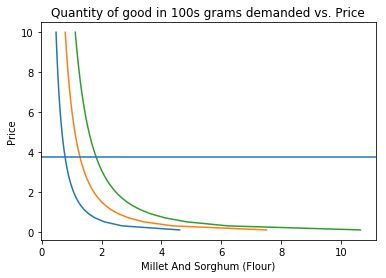

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Values for coconut prices
P = np.linspace(0.1,10,50)

def my_prices(p0,p=p):
    p.loc['Millet And Sorghum (Flour)'] = p0
    return p


for x in [(3927.9419520547945*.05),(6311.8263698630135*.05),(9838.717294520548*.05)]:
    print('5% of budget', x*20, 'is:', x)
    plt.plot([r.demands(x,my_prices(p0))['Millet And Sorghum (Flour)'].values[0] for p0 in P],P)
    #print([r.demands(x,my_prices(p0))['Coconuts (Mature/Immature)'].values for p0 in P])
plt.title('Quantity of good in 100s grams demanded vs. Price');
plt.xlabel('Millet And Sorghum (Flour)');
plt.axhline(3.744)
plt.ylabel('Price');

In [58]:
import pandas as pd
fct = pd.read_pickle('IndianICRISAT/fct.df').T
fct_items = list(fct.columns.levels[0])
fct_items

['Bajra/Pearl millet (HYV)',
 'Bajra/Pearl millet (Local variety)',
 'Banana',
 'Bengalgram (Chenna)/Chickpea',
 'Bengalgram dhal',
 'Blackgram (Urad)',
 'Blackgram dhal',
 'Brinjal',
 'Bullocks',
 'Cabbage',
 'Chillies',
 'Coconut',
 'Coffee',
 'Complete meals in hotel',
 'Cow',
 'Cowpea',
 'Edible oils',
 'Eggs',
 'Fennel',
 'Fish',
 'Ghee',
 'Goat',
 'Grapes',
 'Greengram (Mung)',
 'Greengram dhal',
 'Groundnut oil',
 'Groundnuts',
 'Gur (jaggery)',
 'He buffalo',
 'Jowar/Sorghum (HYV)',
 'Jowar/Sorghum (Local variety)',
 'Leafy vegetables',
 'Lemon',
 'Linseed',
 'Linseed Oil',
 'Maize (HYV)',
 'Maize (Local variety)',
 'Mango',
 'Meals',
 'Milk',
 'Mustard',
 'Onion',
 'Orange',
 'Other Fruits',
 'Other cereals',
 'Other dhal',
 'Other milk products like curd, etc.',
 'Other minor millets',
 'Other oilseeds',
 'Other pulses',
 'Other spices',
 'Other sugar products',
 'Other vegetables',
 'Paddy (HYV)',
 'Paddy (Local variety)',
 'Pan, betel, etc.',
 'Pig',
 'Potato',
 'Poultry bi

In [59]:
demand_items = list(r.demands(x,p).reset_index().iloc[:,0])
demand_items

['Bengalgram dhal',
 'Ceremonial expenses',
 'Chillies',
 'Clothing',
 'Coconut',
 'Complete meals in hotel',
 'Cosmetics tooth paste etc.',
 'Educational material expenses (pen, books, paper, etc.)',
 'Grinding/milling charges',
 'Gur (jaggery)',
 'Jowar/Sorghum (Local variety)',
 "Medicine Doctor's fees",
 'Milk',
 'Onion',
 'Other spices',
 'Other vegetables',
 'Pan, betel, etc.',
 'Redgram dhal',
 'Soap, washing powder',
 'Sugar',
 'Tea',
 'Tobacco, beedi',
 'Travel & Entertainment',
 'Utilities']

In [60]:
final = []
for i in demand_items:
    if i in fct_items:
        final = np.append(i, final)
final

array(['Tea', 'Sugar', 'Redgram dhal', 'Pan, betel, etc.',
       'Other vegetables', 'Other spices', 'Onion', 'Milk',
       'Jowar/Sorghum (Local variety)', 'Gur (jaggery)',
       'Complete meals in hotel', 'Coconut', 'Chillies',
       'Bengalgram dhal'], dtype='<U32')

In [61]:
#fct.T.loc[final].T
fct.T.loc[final]

,,protein,fat,fibre,carbohydrate,energy_kcal,energy_kj,calcium,iron,betacarotene,caroten_total,thiamine,riboflavin,niacin,ascorbic_total,ext_source,pu_cal,pu_prot,pu_fat
ICRISAT Food Label,unit,,,,,,,,,,,,,,,,,,
Jowar/Sorghum (Local variety),Kilograms,99.700005,17.299999,102.200005,676.799988,3339.065430,13980.000000,276.000000,39.500000,82.900002,2120.000000,3.500000,1.400000,21.000000,0.000000,0.0,3490.000000,104.0,19.000000
Redgram dhal,Kilograms,187.700012,51.100002,252.199997,395.600006,2868.539062,12010.000000,1500.000000,67.800003,1720.000000,9990.000000,3.700000,2.400000,21.000000,0.000000,0.0,3720.000000,208.0,56.000000
Bengalgram dhal,Kilograms,187.700012,51.100002,252.199997,395.600006,2868.539062,12010.000000,1500.000000,67.800003,1720.000000,9990.000000,3.700000,2.400000,21.000000,0.000000,0.0,3720.000000,208.0,56.000000
Milk,Kilograms,32.599998,44.799999,0.000000,49.400002,728.479980,3050.000000,1210.000000,1.600000,136.699997,2000.000000,0.300000,1.100000,0.800000,20.100000,0.0,1000.000000,40.0,70.000000
Sugar,Kilograms,18.500000,160.000000,0.000000,848.700012,3534.919189,14800.000000,1070.000000,46.300003,0.000000,184.899994,0.400000,0.100000,0.200000,0.000000,0.0,3980.000000,1.0,0.000000
Gur (jaggery),Kilograms,18.549999,160.000000,0.000000,848.750000,3534.919189,14800.000000,1070.000000,46.349998,5.000000,184.949997,0.400000,0.100000,0.200000,5.000000,0.0,3830.000000,4.0,1.000000
Onion,Kilograms,15.000000,2.400000,24.500000,95.600006,480.080261,2010.000000,210.300003,4.300000,10.800000,891.000000,0.400000,0.100000,3.400000,66.900002,0.0,550.000000,15.0,1.000000
Chillies,Kilograms,23.599998,7.200000,47.700001,58.600002,422.757233,1770.000000,184.500000,12.000000,1250.000000,13470.000000,0.900000,1.100000,8.900000,940.700012,0.0,290.000000,29.0,6.000000
Other vegetables,Rupees,1.350488,0.304390,3.114390,10.391220,51.331821,214.916077,25.916830,0.766829,295.878937,1047.152466,0.044146,0.040244,0.432927,29.593170,0.0,27.700001,0.8,0.160000


In [70]:
for i in final:
    print(r.demands(x,p)[i])
    fct.T.loc[final].loc[i] = (fct.T.loc[final].loc[i]*(r.demands(x,p)[i]))
fct.T.loc[final]

0.6937652287229205
1.2154930475730117
3.880808449262953
4.764309585505021
1.694213014856744
3.803111090059899
1.018964311512099
12.10715554818799
3.1805934903537914
2.474765668452344
1.63566095867882
0.4584097868446399
1.329265278550724
1.7803615787647955


,,protein,fat,fibre,carbohydrate,energy_kcal,energy_kj,calcium,iron,betacarotene,caroten_total,thiamine,riboflavin,niacin,ascorbic_total,ext_source,pu_cal,pu_prot,pu_fat
ICRISAT Food Label,unit,,,,,,,,,,,,,,,,,,
Jowar/Sorghum (Local variety),Kilograms,99.700005,17.299999,102.200005,676.799988,3339.065430,13980.000000,276.000000,39.500000,82.900002,2120.000000,3.500000,1.400000,21.000000,0.000000,0.0,3490.000000,104.0,19.000000
Redgram dhal,Kilograms,187.700012,51.100002,252.199997,395.600006,2868.539062,12010.000000,1500.000000,67.800003,1720.000000,9990.000000,3.700000,2.400000,21.000000,0.000000,0.0,3720.000000,208.0,56.000000
Bengalgram dhal,Kilograms,187.700012,51.100002,252.199997,395.600006,2868.539062,12010.000000,1500.000000,67.800003,1720.000000,9990.000000,3.700000,2.400000,21.000000,0.000000,0.0,3720.000000,208.0,56.000000
Milk,Kilograms,32.599998,44.799999,0.000000,49.400002,728.479980,3050.000000,1210.000000,1.600000,136.699997,2000.000000,0.300000,1.100000,0.800000,20.100000,0.0,1000.000000,40.0,70.000000
Sugar,Kilograms,18.500000,160.000000,0.000000,848.700012,3534.919189,14800.000000,1070.000000,46.300003,0.000000,184.899994,0.400000,0.100000,0.200000,0.000000,0.0,3980.000000,1.0,0.000000
Gur (jaggery),Kilograms,18.549999,160.000000,0.000000,848.750000,3534.919189,14800.000000,1070.000000,46.349998,5.000000,184.949997,0.400000,0.100000,0.200000,5.000000,0.0,3830.000000,4.0,1.000000
Onion,Kilograms,15.000000,2.400000,24.500000,95.600006,480.080261,2010.000000,210.300003,4.300000,10.800000,891.000000,0.400000,0.100000,3.400000,66.900002,0.0,550.000000,15.0,1.000000
Chillies,Kilograms,23.599998,7.200000,47.700001,58.600002,422.757233,1770.000000,184.500000,12.000000,1250.000000,13470.000000,0.900000,1.100000,8.900000,940.700012,0.0,290.000000,29.0,6.000000
Other vegetables,Rupees,1.350488,0.304390,3.114390,10.391220,51.331821,214.916077,25.916830,0.766829,295.878937,1047.152466,0.044146,0.040244,0.432927,29.593170,0.0,27.700001,0.8,0.160000


In [68]:
fct.T.loc[final].loc['Other spices']

,protein,fat,fibre,carbohydrate,energy_kcal,energy_kj,calcium,iron,betacarotene,caroten_total,thiamine,riboflavin,niacin,ascorbic_total,ext_source,pu_cal,pu_prot,pu_fat
unit,,,,,,,,,,,,,,,,,,
Kilograms,71.342857,23.414286,169.15715,310.942871,1806.698608,7564.285645,2105.414307,121.428581,16862.650391,181244.15625,1.757143,2.028571,17.928572,39.585712,0.0,3599.999905,140.0,189.999998
